# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

In [226]:
#%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_NYC_parking_issues=pd.read_csv("sample_NYC_parking_issues.csv",sep=";")

### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [227]:
df_limpio = df_NYC_parking_issues.dropna(axis=1, how='all') #elimina las columnas que tienen todos sus valores NaN

### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [ ]:
#observamos los tipos de datos que hay en la columna para saber cuales son incoherentes
print(df_limpio["Vehicle Year"].unique())
#Eliminamos los años 0 y los años por encima de 2024
df1=df_limpio[(df_limpio['Vehicle Year'] > 0) & (df_limpio['Vehicle Year'] <= 2024)]
df1['Vehicle Year'] = df1['Vehicle Year'].astype(int)

[2004. 2008. 2006. 1996. 2003. 2012. 2011.    0. 2001. 1988. 1998. 2009.
 2002. 1994. 1997. 2007. 2010. 2013. 1995. 2005. 1999. 2014. 1987. 1985.
 1989. 1993. 1992. 1990. 2015. 1982. 1991. 1986. 1984. 1983. 2069. 1980.]


C:\Users\sheil\AppData\Local\Temp\ipykernel_35480\1089706728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Vehicle Year'] = df1['Vehicle Year'].astype(int)


,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,...,YYYYYYY,NaN,NaN,WH,NaN,2004,NaN,0.0,01 4,71A-Insp Sticker Expired (NYS)
1,1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,...,NaN,NaN,NaN,BK,NaN,2008,NaN,0.0,NaN,FAILURE TO STOP AT RED LIGHT
2,5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,...,BBBBBBB,ALL,ALL,NaN,0.0,2006,-,0.0,NaN,NaN
3,6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,...,Y Y,1130A,0100P,GY,NaN,2008,NaN,0.0,14 4,21-No Parking (street clean)
4,2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,...,YYYYY,0800A,0600P,MR,NaN,1996,NaN,0.0,03-A,20A-No Parking (Non-COM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,5891659,4002595663,GLR8223,NY,PAS,03/05/2014,5,SUBN,FORD,V,...,NaN,NaN,NaN,RD,NaN,2005,NaN,0.0,NaN,BUS LANE VIOLATION
9995,51871,1359994981,42799JW,NY,COM,07/24/2013,14,VAN,FRG,P,...,BBBBBBB,ALL,ALL,WHIT,0.0,2007,-,0.0,NaN,NaN
9997,5536586,1353773541,FXW2962,NY,PAS,02/21/2014,16,SDN,MAZDA,T,...,BBBBBBB,0 :,0 :,GR,0.0,1996,-,0.0,NaN,NaN
9998,1127482,7207594008,CLR2162,NY,PAS,09/05/2013,37,4DSD,HONDA,T,...,Y,0800A,1000P,SILVE,NaN,2006,495-0067,0.0,52-P,37-Expired Muni Meter


### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [229]:
#observamos los tipos de datos que hay en la columna para saber cuales son incoherentes
print(df1["Vehicle Make"].unique())
print(f"Inicialmente hay {df1["Vehicle Make"].nunique()} marcas de coches diferentes.")
marcas_invalidas=["ME/BE", "NS/OT", "WORK", "WORKH", "FREI", "LEXCO","FRUEH","UTIL","SMITH","UD","FR/LI","CHEET","UTITY","PREVO","WANC","FRGHT","ICENE","UTILI","WO/C","THD","RNG R","WANC", "VAN H","SMITH", "GIDNY","SPRI","VL", "WOR","PUTEL","FRG" ]
print(f"Se eliminaron {len(marcas_invalidas)} marcas de coches que no se corresponden con ninguna marca real.")
df2=df1[~df1['Vehicle Make'].isin(marcas_invalidas)]
print(f"Se eliminaron {len(df1) - len(df2)} filas.")

['FRIG' 'DODGE' 'HONDA' 'TOYOT' 'VOLKS' 'INTER' 'FORD' 'GMC' 'ME/BE'
 'NISSA' 'CHEVR' 'INFIN' 'LEXUS' 'VOLVO' 'MERCU' 'ACURA' 'NS/OT' 'BMW'
 'PETER' 'LINCO' 'ISUZU' 'FRUEH' 'CHRYS' 'CADIL' 'WORK' 'SUBAR' 'HYUND'
 'SAAB' 'PREV' 'PONTI' 'MITSU' 'ROVER' 'JEEP' 'MAZDA' 'LEXCO' 'WORKH'
 'PORSC' 'FREI' 'AUDI' 'MACK' 'HINO' 'KIA' 'KENWO' 'BENTL' 'UTIL' 'JAGUA'
 'SOLEC' nan 'MI/F' 'MINI' 'BUICK' 'SATUR' 'NAVIS' 'STARC' 'OLDSM' 'VAN H'
 'SMITH' 'UD' 'PRATT' 'FR/LI' 'CHEET' 'SMART' 'UTITY' 'PREVO' 'PLYMO'
 'SUZUK' 'HUMME' 'W' 'KAWAS' 'FIAT' 'FR/L' 'FR L' 'FRGHT' 'ICENE' 'UTILI'
 'WO/C' 'THD' 'VESPA' 'GEM' 'WHITE' 'CHECK' 'RNG R' 'WANC' 'VOLU' 'LIMO'
 'BL/B' 'KENW' 'KRYS' 'MCI' 'KW' 'SZI' 'STAR' 'UPS' 'HERCU' 'GIDNY' 'SPRI'
 'VL' 'WOR' 'AMC' 'PUTEL' 'FRG']
Inicialmente hay 100 marcas de coches diferentes.
Se eliminaron 30 marcas de coches que no se corresponden con ninguna marca real.
Se eliminaron 576 filas.


### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

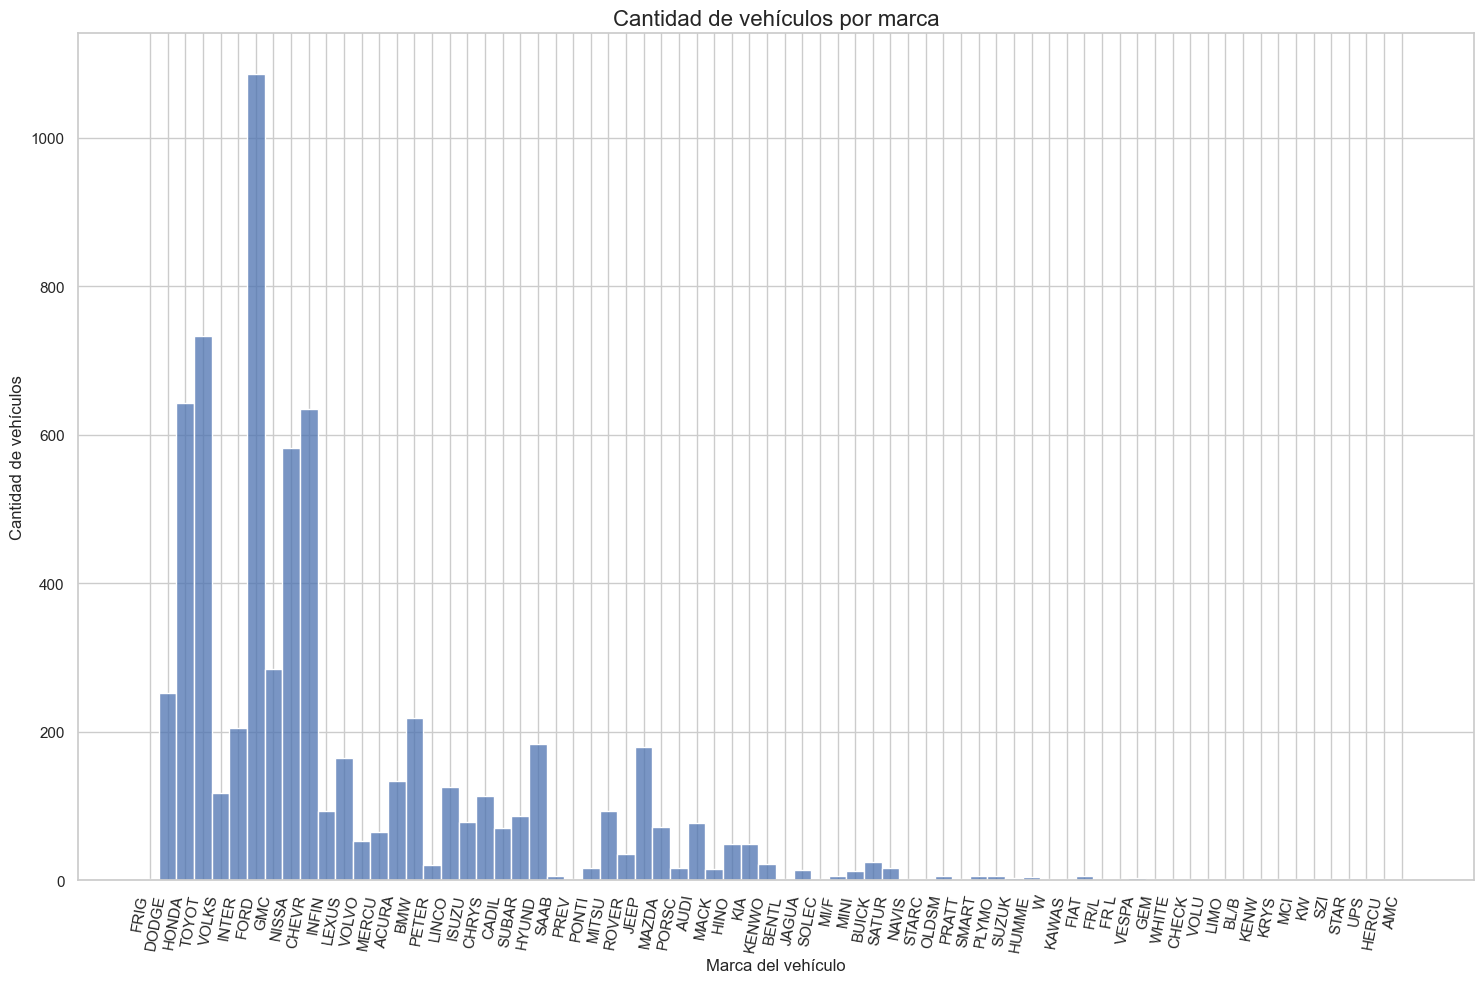

In [230]:
plt.figure(figsize=(15, 10))  
sns.histplot(df2["Vehicle Make"], kde=False)

plt.title('Cantidad de vehículos por marca', fontsize=16)
plt.xlabel('Marca del vehículo', fontsize=12)
plt.ylabel('Cantidad de vehículos', fontsize=12)

plt.xticks(rotation=80, ha='right')

plt.tight_layout()
plt.show()

### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [231]:
#Observamos los tipos de datos que hay en la columna para saber cuales son incoherentes
print(df2["Vehicle Color"].unique())
colores = {
    'WH': 'WHITE', 'WHITE': 'WHITE', 'WHT': 'WHITE', 'WTH': 'WHITE', 'WH/': 'WHITE', 'WHI': 'WHITE', 'WT': 'WHITE', 'W': 'WHITE', 'WHIT': 'WHITE', 
    'BK': 'BLACK', 'BLK': 'BLACK', 'BLACK': 'BLACK', 'BL': 'BLACK', 'B': 'BLACK', 'BKJ': 'BLACK', 'BLK/B': 'BLACK', 'BKG': 'BLACK', 'BLK/BK': 'BLACK',
    'GY': 'GRAY', 'GREY': 'GRAY', 'GRAY': 'GRAY', 'GRY': 'GRAY', 'GY-GY': 'GRAY', 'GRY': 'GRAY', 'DKGY': 'GRAY', 
    'LTGY': 'GRAY', 'GY/': 'GRAY', 'GYGY': 'GRAY', 
    'MR': 'MAROON', 'BR': 'BROWN', 'BROWN': 'BROWN', 'BRN': 'BROWN', 'BRW': 'BROWN', 'BROW': 'BROWN', 'BG': 'BROWN',  'BROWN': 'BROWN','BN': 'BROWN',
    'TAN': 'TAN', 'TN': 'TAN', 'BEIGE': 'BEIGE', 'GOLD': 'GOLD', 'SL': 'SILVER', 'SILVE': 'SILVER', 'SILV': 'SILVER', 'SIL': 'SILVER', 'SILVR': 'SILVER',
    'RED': 'RED', 'RD/': 'RED', 'RD': 'RED', 'R':'RED',
    'YELLO': 'YELLOW', 'YW': 'YELLOW', 'YEL': 'YELLOW', 'YL': 'YELLOW', 'YELLO': 'YELLOW', 'YELOW':'YELLOW',
    'GREEN': 'GREEN', 'GRN': 'GREEN', 'GR': 'GREEN', 'GRG': 'GREEN', 'GN': 'GREEN', 'GREN': 'GREEN', 'GRT': 'GREEN','LTG':'GREEN','GL':'GREEN','DKG':'GREEN',
    'BLUE': 'BLUE', 'BLU': 'BLUE', 'BLUE': 'BLUE', 'BLU': 'BLUE',  'DKBL': 'BLUE','LTB':'BLUE','LTBL':'BLUE','DKB':'BLUE',
    'PUR': 'PURPLE', 'PURPL': 'PURPLE', 'TOPAZ': 'PURPLE',
    'ORANGE': 'ORANGE', 'ORANG': 'ORANGE', 'OR': 'ORANGE', 'BUY': 'ORANGE', 
    'NOCL': 'OTHER', 'NOC': 'OTHER', 'UNKNO': 'OTHER', 'OTHER': 'OTHER', 'MC': 'OTHER','DK/': 'OTHER','WGUTE' :'OTHER','LT/':'OTHER',
    'LTP': 'PURPLE', 'DKR': 'RED', 'PR': 'PURPLE',
    'BKBR': 'COMBINATION', 'GYBR':'COMBINATION','BUS': 'COMBINATION','BLG':'COMBINATION','RB': 'COMBINATION','BK-RD': 'COMBINATION','TNGR': 'COMBINATION','BLGY': 'COMBINATION','GYW': 'COMBINATION',
    'WHR': 'COMBINATION','GYT': 'COMBINATION','GYTN': 'COMBINATION','WH-BL': 'COMBINATION'}
df3=df2
df3['Vehicle Color']= df2['Vehicle Color'].replace(colores)
df3 = df3.dropna(subset=['Vehicle Color'])
print(df3["Vehicle Color"].unique())

['WH' 'BK' nan 'GY' 'MR' 'RD' 'BR' 'TAN' 'BL' 'WHITE' 'BROWN' 'BLUE'
 'BLACK' 'TN' 'OTHER' 'YW' 'BLK' 'DKB' 'GREY' 'GOLD' 'GR' 'BRN' 'PR' 'LTP'
 'RED' 'GRN' 'DKGY' 'WT' 'SILVE' 'SILV' 'DKG' 'GRAY' 'GREEN' 'GL' 'GREN'
 'WHT' 'WTH' 'WH-BL' 'YELLO' 'SIL' 'ORANG' 'BUY' 'GRY' 'GYT' 'OR' 'SL'
 'LTGY' 'YL' 'BEIGE' 'LTBL' 'BN' 'LTG' 'LT/' 'W' 'NOCL' 'WHR' 'GYW' 'BLU'
 'GY/' 'WHI' 'NOC' 'B' 'BG' 'GN' 'GRG' 'SILVR' 'YEL' 'BKJ' 'GYGY' 'DK/'
 'WH/' 'DKR' 'BLK/B' 'PURPL' 'UNKNO' 'YELOW' 'R' 'BLGY' 'TNGR' 'BK-RD'
 'DKBL' 'TOPAZ' 'RB' 'GY-GY' 'WGUTE' 'RD/' 'WHIT' 'BLG' 'LTB' 'BUS' 'GYTN'
 'GRT' 'GYBR' 'PUR' 'BKBR']
['WHITE' 'BLACK' 'GRAY' 'MAROON' 'RED' 'BROWN' 'TAN' 'BLUE' 'OTHER'
 'YELLOW' 'GOLD' 'GREEN' 'PURPLE' 'SILVER' 'COMBINATION' 'ORANGE' 'BEIGE']


C:\Users\sheil\AppData\Local\Temp\ipykernel_35480\3795806785.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Vehicle Color']= df2['Vehicle Color'].replace(colores)


### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

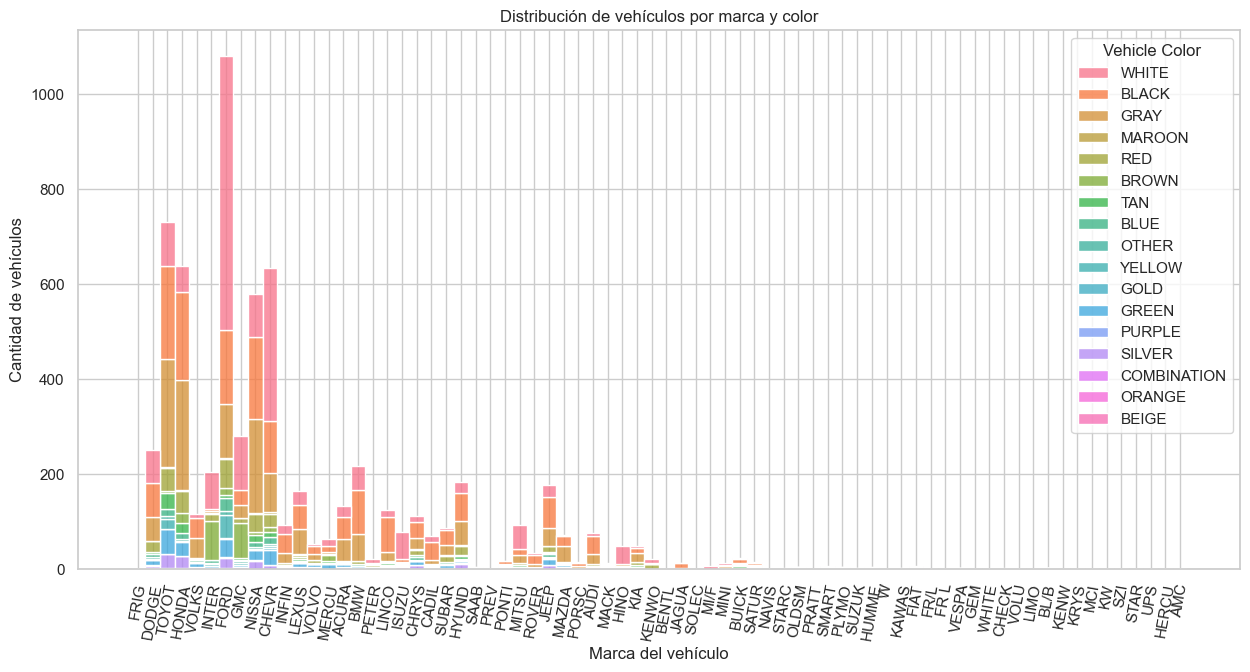

In [232]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df3, x="Vehicle Make", hue="Vehicle Color", multiple="stack", kde=False)

plt.title('Distribución de vehículos por marca y color')
plt.xlabel('Marca del vehículo')
plt.ylabel('Cantidad de vehículos')
plt.xticks(rotation=80)

plt.show()

### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [233]:
df3['Issue Date'] = pd.to_datetime(df3['Issue Date'], errors='coerce')

df3['Year-Month'] = df3['Issue Date'].dt.to_period('M')

violation_counts = df3.groupby(['Year-Month', 'Violation Code']).size().unstack(fill_value=0)

C:\Users\sheil\AppData\Local\Temp\ipykernel_35480\2591870677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Issue Date'] = pd.to_datetime(df3['Issue Date'], errors='coerce')
C:\Users\sheil\AppData\Local\Temp\ipykernel_35480\2591870677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year-Month'] = df3['Issue Date'].dt.to_period('M')


### J) Visualiza la anterior cuestión (I)

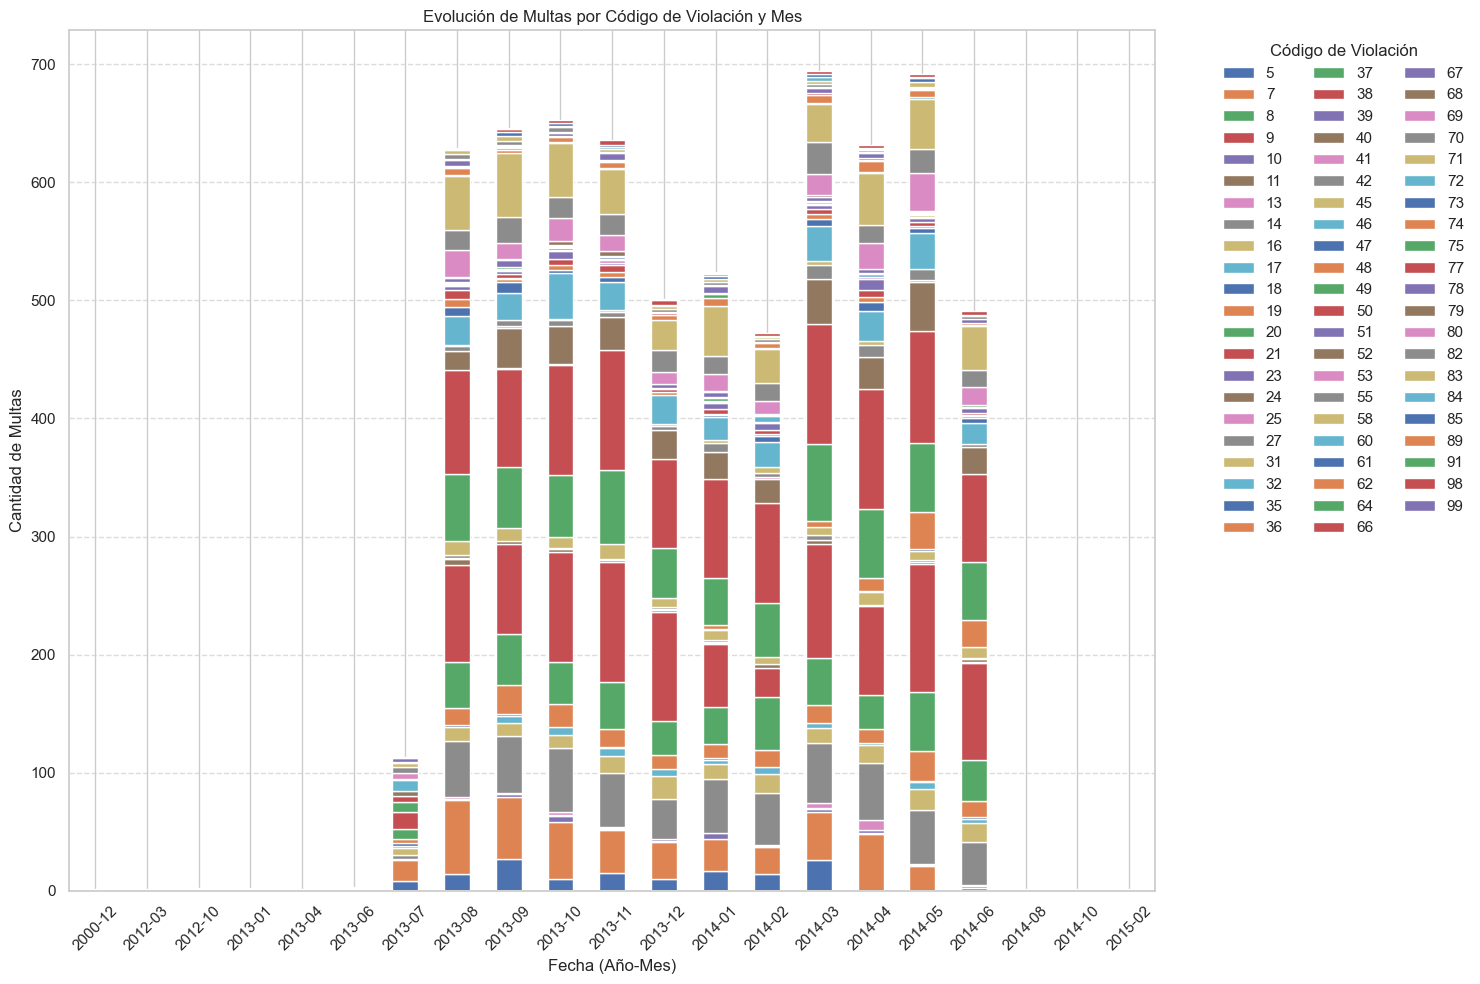

In [234]:
violation_counts.plot(kind='bar', stacked=True, figsize=(15, 10))

plt.title('Evolución de Multas por Código de Violación y Mes')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Cantidad de Multas')
plt.xticks(rotation=45)
plt.legend(title='Código de Violación', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3, frameon=False) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'